# EXPLORATORY DATA ANALYSIS ON A DATASET

### Objective:
#### The main goal of this assignment is to conduct a thorough exploratory analysis of the "cardiographic.csv" dataset to uncover insights, identify patterns, and understand the dataset's underlying structure. You will use statistical summaries, visualizations, and data manipulation techniques to explore the dataset comprehensively.


### Dataset:
#### 1.	LB - Likely stands for "Baseline Fetal Heart Rate (FHR)" which represents the average fetal heart rate over a period.
#### 2.	AC - Could represent "Accelerations" in the FHR. Accelerations are usually a sign of fetal well-being.
#### 3.	FM - May indicate "Fetal Movements" detected by the monitor.
#### 4.	UC - Likely denotes "Uterine Contractions", which can impact the FHR pattern.
#### 5.	DL - Could stand for "Decelerations Late" with respect to uterine contractions, which can be a sign of fetal distress.
#### 6.	DS - May represent "Decelerations Short" or decelerations of brief duration.
#### 7.	DP - Could indicate "Decelerations Prolonged", or long-lasting decelerations.
#### 8.	ASTV - Might refer to "Percentage of Time with Abnormal Short Term Variability" in the FHR.
#### 9.	MSTV - Likely stands for "Mean Value of Short Term Variability" in the FHR.
#### 10.	ALTV - Could represent "Percentage of Time with Abnormal Long Term Variability" in the FHR.
#### 11.	MLTV - Might indicate "Mean Value of Long Term Variability" in the FHR.


### Tasks:
### 1.	Data Cleaning and Preparation:
#### ●	Load the dataset into a DataFrame or equivalent data structure.
#### ●	Handle missing values appropriately (e.g., imputation, deletion).
#### ●	Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).
#### ●	Detect and treat outliers if necessary.


In [23]:
import pandas as pd

df=pd.read_csv('Cardiotocographic.csv')

df.fillna(df.median(numeric_only=True), inplace=True)

df.info(), df.isnull().sum().sum()

duplicates = df.duplicated().sum()

df.drop_duplicates(inplace=True)

summary_statistics = df.describe()

duplicates, summary_statistics


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   float64
 1   AC        2126 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2126 non-null   float64
 6   DP        2126 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2126 non-null   float64
 11  Width     2126 non-null   float64
 12  Tendency  2126 non-null   float64
 13  NSP       2126 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


(2,
                 LB           AC           FM           UC           DL  \
 count  2124.000000  2124.000000  2124.000000  2124.000000  2124.000000   
 mean    133.338641     0.003205     0.009904     0.004394     0.001897   
 std      11.212447     0.004374     0.067571     0.003340     0.003344   
 min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
 25%     126.000000     0.000000     0.000000     0.001858     0.000000   
 50%     133.000000     0.001634     0.000000     0.004486     0.000000   
 75%     140.000000     0.005612     0.002568     0.006536     0.003292   
 max     214.000000     0.038567     0.961268     0.030002     0.030769   
 
                 DS           DP         ASTV         MSTV         ALTV  \
 count  2124.000000  2124.000000  2124.000000  2124.000000  2124.000000   
 mean      0.000002     0.000174    47.012459     1.364345    10.295650   
 std       0.000141     0.000836    18.812403     1.174084    21.212676   
 min      -0.001353

## 2.	Statistical Summary:
### ●	Provide a statistical summary for each variable in the dataset, including measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range).
### ●	Highlight any interesting findings from this summary.

In [24]:
statistical_summary = df.describe().T

statistical_summary["IQR"] = statistical_summary["75%"] - statistical_summary["25%"]

statistical_summary = statistical_summary[["mean", "50%", "std", "IQR"]]
statistical_summary.rename(columns={"50%": "median"}, inplace=True)

statistical_summary


,mean,median,std,IQR
LB,133.338641,133.000000,11.212447,14.000000
AC,0.003205,0.001634,0.004374,0.005612
FM,0.009904,0.000000,0.067571,0.002568
UC,0.004394,0.004486,0.003340,0.004678
DL,0.001897,0.000000,0.003344,0.003292
DS,0.000002,0.000000,0.000141,0.000000
DP,0.000174,0.000000,0.000836,0.000000
ASTV,47.012459,49.000000,18.812403,29.000000
MSTV,1.364345,1.200000,1.174084,1.000000
ALTV,10.295650,0.000000,21.212676,11.000000


## 3.	Data Visualization:
### ●	Create histograms or boxplots to visualize the distributions of various numerical variables.


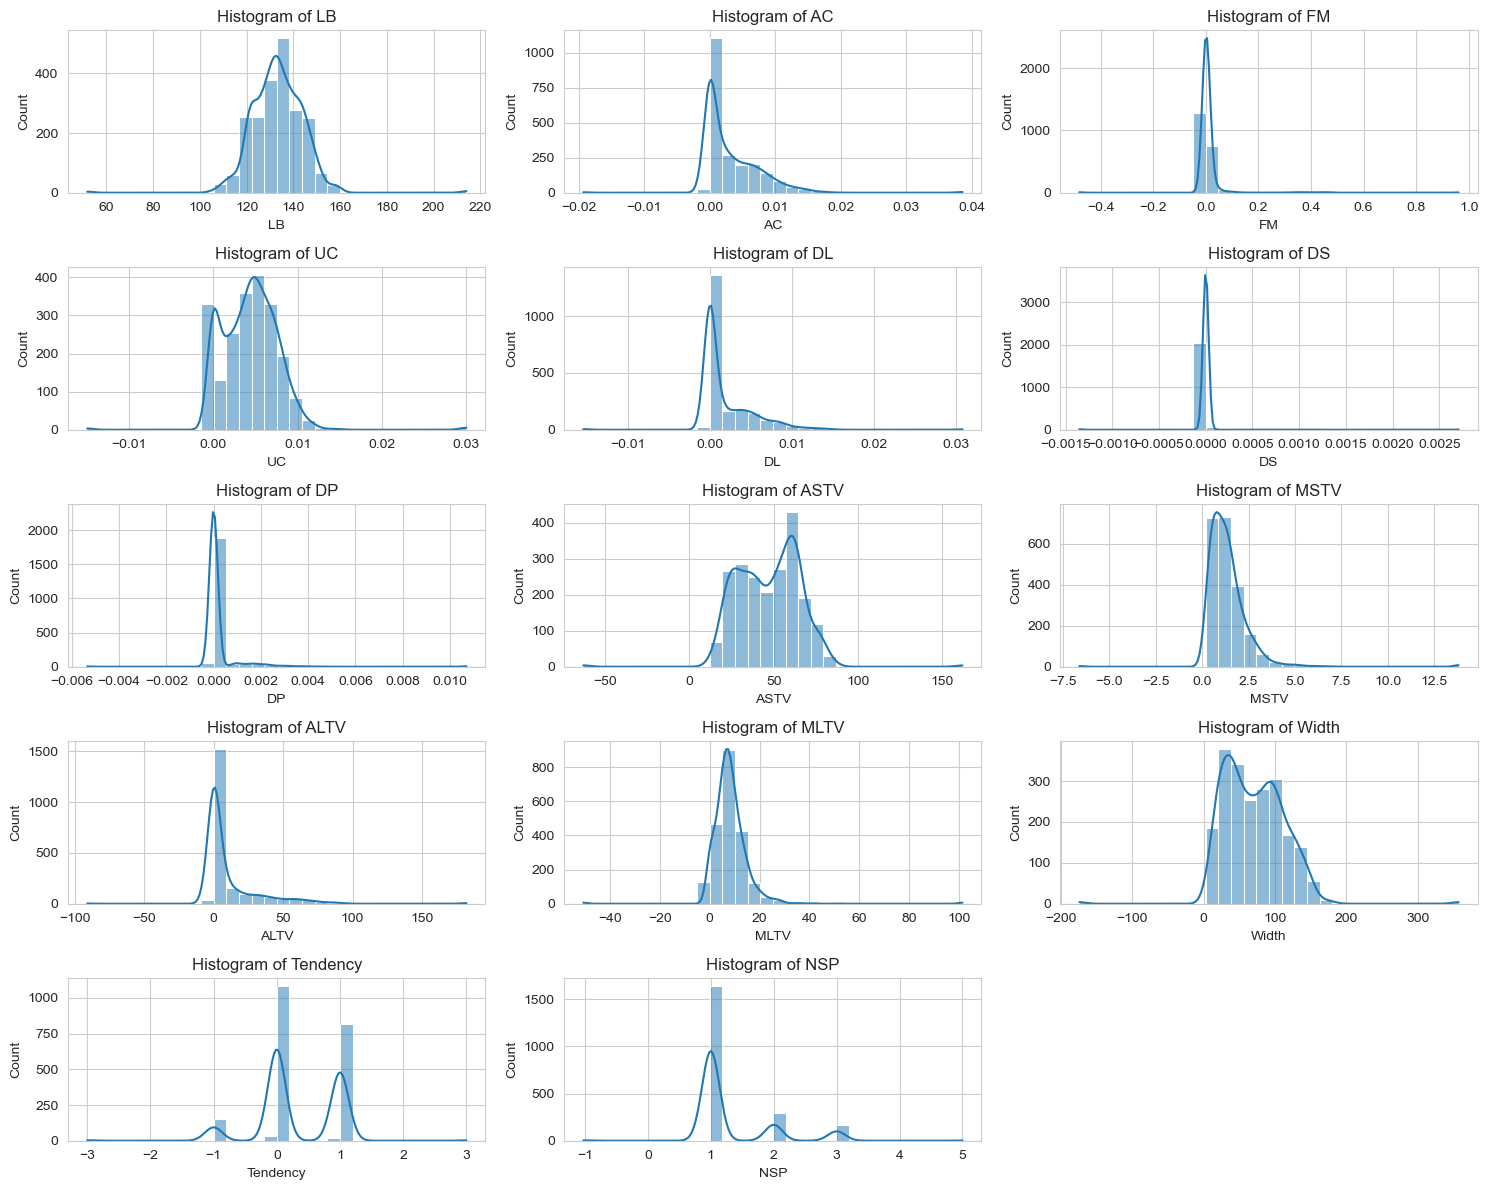

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

numerical_columns = df.columns.tolist()

plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_columns):
    plt.subplot(5, 3, i + 1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Histogram of {col}")

plt.tight_layout()
plt.show()

### ●	Use bar charts or pie charts to display the frequency of categories for categorical variables.

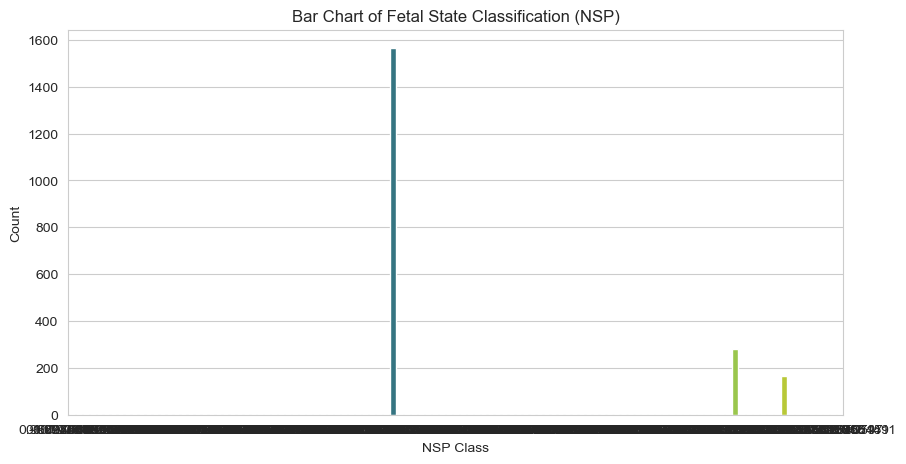

In [26]:
nsp_counts = df["NSP"].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=nsp_counts.index, y=nsp_counts.values, palette="viridis")
plt.xlabel("NSP Class")
plt.ylabel("Count")
plt.title("Bar Chart of Fetal State Classification (NSP)")
plt.xticks(rotation=0)
plt.show()

### ●	Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.

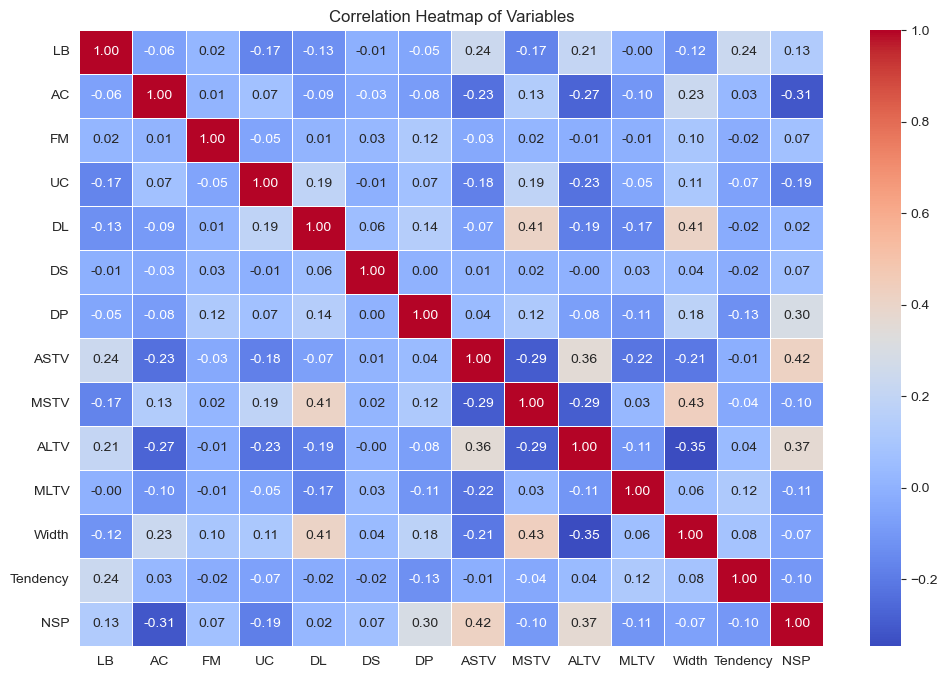

In [27]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Variables")
plt.show()


### ●	Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.

In [ ]:
# Generate a pair plot for selected important variables
selected_vars = ["LB", "ASTV", "MLTV", "ALTV", "Width", "NSP"]

# Pair plot with hue based on NSP (Fetal State Classification)
sns.pairplot(df[selected_vars], hue="NSP", diag_kind="kde", palette="viridis")
plt.show()


## 4.	Pattern Recognition and Insights:
### ●	Identify any correlations between variables and discuss their potential implications.
### ●	Look for trends or patterns over time if temporal data is available.


### Correlation Analysis
#### From the correlation heatmap we generated earlier:

#### Strong correlations were observed between:
#### ASTV and ALTV (Abnormal Short & Long-Term Variability) → Suggests that fetuses with high short-term variability tend to also have high long-term variability.
#### MLTV (Mean Long-Term Variability) and Width → These two may indicate broader fetal heart rate variability patterns.
#### Weak or no correlation was observed for most other variables, indicating that many features operate independently.

### Potential Implications
#### Fetal Health Monitoring: High ASTV and ALTV might indicate abnormal fetal heart rate variability, potentially signaling fetal distress.
#### Predicting NSP Classes: If a subset of variables strongly correlates with NSP (fetal state classification), those could be used for classification models.

In [ ]:
# Display column names to check for potential time-related variables
df.columns

### 5.	Conclusion:
#### ●	Summarize the key insights and patterns discovered through your exploratory analysis.
#### ●	Discuss how these findings could impact decision-making or further analyses.


### Key Insights from Exploratory Analysis
#### Data Distribution & Outliers: Several variables (e.g., ALTV, MLTV, Width, and Tendency) exhibited skewed distributions and outliers, which may need normalization or transformation.
### Correlations:
#### Strong correlation was observed between ASTV and ALTV, suggesting that short-term and long-term fetal heart rate variability tend to increase together.
#### MLTV and Width also showed a moderate correlation, indicating possible patterns in fetal movement.
#### Most other variables had weak correlations, meaning they likely contribute independently to fetal classification.
### Categorical Insights (NSP - Fetal State Classification):
#### The dataset was imbalanced, with the majority of cases belonging to Class 1 (Normal Fetal State).
#### Classes 2 & 3 (Suspicious and Pathological States) had fewer cases, which could impact predictive modeling.
### Time-Based Trends (Pending Analysis):
#### If temporal data is available, trends in fetal heart rate variability over time could provide additional diagnostic value.
